In [1]:
import numpy as np
import pylab as plt
import pandas as pd
from sklearn import svm
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

np.random.seed(5)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20 # specifies the class of dots 0 = blue and 1 = red
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm, s=25)

print(X.shape)
print(len(Y))

(40, 2)
40




##  SVM classifier

### Linear SVC (linear kernel)
class sklearn.svm.LinearSVC(penalty=’l2’, loss=’squared_hinge’, dual=True, tol=0.0001, C=1.0, multi_class=’ovr’, fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)

https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html

In [2]:
clf = svm.LinearSVC().fit(X, Y)

print(clf.coef_)
print(clf.intercept_)

[[0.66724043 0.5752985 ]]
[-0.08200208]


$ -coef\left[1\right] * y = coef\left[0\right] * x + intercept\left[0\right] $

In [3]:
# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx2, yy2 = np.meshgrid(np.arange(x_min, x_max, .2),
                     np.arange(y_min, y_max, .2))

Z = clf.predict(np.c_[xx2.ravel(), yy2.ravel()])
print(Z.shape)
print(Z[0:-1:20])

(2208,)
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0
 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1
 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1]


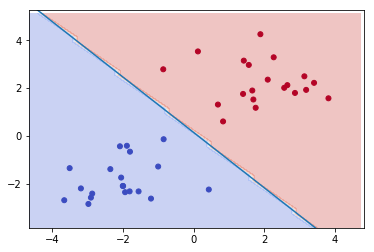

In [4]:
Z = Z.reshape(xx2.shape)
fig, ax = plt.subplots()
ax.contourf(xx2, yy2, Z, cmap=plt.cm.coolwarm, alpha=0.3)
ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm, s=25)
ax.plot(xx,yy)

ax.axis([x_min, x_max,y_min, y_max])
plt.show()

### Linearly Separable data with added noise

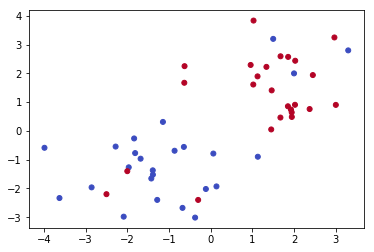

In [5]:
np.random.seed(6)
X = np.r_[np.random.randn(25, 2) - [1.5, 1.5], np.random.randn(25, 2) + [1.5, 1.5]]

X[22] = [2,2]
X[23] = [1.5,3.2]
X[24] = [3.3,2.8]

X[47] = [-2,-1.4]
X[48] = [-2.5,-2.2]
X[49] = [-0.3,-2.4]


Y = [0] * 25 + [1] * 25 # specifies the class of dots 0 = blue and 1 = red
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm, s=25)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


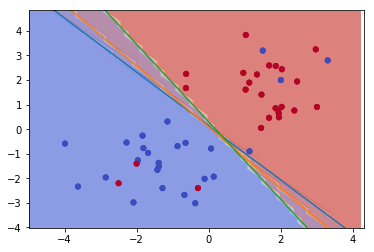

In [6]:
fig, ax = plt.subplots()
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
ax.axis([x_min, x_max,y_min, y_max])

for C in [1,10,100]:
    clf = svm.LinearSVC(C=100, max_iter=10000).fit(X, Y)
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # create a mesh to plot in


    xx2, yy2 = np.meshgrid(np.arange(x_min, x_max, .2),
                     np.arange(y_min, y_max, .2))

    Z = clf.predict(np.c_[xx2.ravel(), yy2.ravel()])

    Z = Z.reshape(xx2.shape)

    ax.contourf(xx2, yy2, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm, s=25)
    ax.plot(xx,yy)


plt.show()


### Multiple classes (one-vs-rest classifier)

(60, 2)


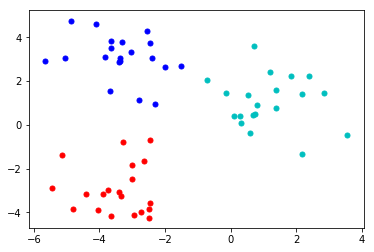

In [7]:
np.random.seed(2)
X = np.r_[np.random.randn(20, 2) - [3, 3], np.random.randn(20, 2) + [-3, 3], np.random.randn(20, 2) + [1, 1]]
Y = [0] * 20 + [1] * 20 + [2] * 20

plt.scatter(X[:20,0], X[:20,1], color='r', cmap=plt.cm.coolwarm, s=25)
plt.scatter(X[20:40,0], X[20:40,1], color='b', cmap=plt.cm.coolwarm, s=25)
plt.scatter(X[40:60,0], X[40:60,1], color='c', cmap=plt.cm.coolwarm, s=25)

print(X.shape)

In [8]:
clf = svm.LinearSVC().fit(X, Y)

print(clf.coef_)
print(clf.intercept_)

[[-0.40669705 -0.85852428]
 [-0.44235845  0.55346817]
 [ 0.9962111   0.12932395]]
[-0.98099228 -1.64565388  0.74610998]


In [9]:
w1 = clf.coef_[0]
a1 = -w1[0] / w1[1]
xx1 = np.linspace(-6, 6)
yy1 = a1 * xx1 - (clf.intercept_[0]) / w1[1]

w2 = clf.coef_[1]
a2 = -w2[0] / w2[1]
xx2 = np.linspace(-6, 6)
yy2 = a2 * xx2 - (clf.intercept_[1]) / w2[1]

w3 = clf.coef_[2]
a3 = -w3[0] / w3[1]
xx3 = np.linspace(-6, 6)
yy3 = a3 * xx3 - (clf.intercept_[2]) / w3[1]

In [10]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xxx, yyy = np.meshgrid(np.arange(x_min, x_max, .2),
                     np.arange(y_min, y_max, .2))

Z = clf.predict(np.c_[xxx.ravel(), yyy.ravel()])
print(Z.shape)
print(Z[0:-1:30])

(3135,)
[0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 0 2 0 0 0 0 0 0 0 0 2 0 2 0 2 0 2 0 2 0 2
 0 0 0 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 1 1 1 2 1 2 1 2 1 2]


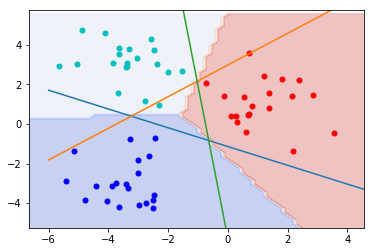

In [11]:
Z = Z.reshape(xxx.shape)
fig, ax = plt.subplots()


ax.contourf(xxx, yyy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
ax.scatter(X[:20,0], X[:20,1], color='b', cmap=plt.cm.coolwarm, s=25)
ax.scatter(X[20:40,0], X[20:40,1], color='c', cmap=plt.cm.coolwarm, s=25)
ax.scatter(X[40:60,0], X[40:60,1], color='r', cmap=plt.cm.coolwarm, s=25)

ax.plot(xx1,yy1)
ax.plot(xx2,yy2)
ax.plot(xx3,yy3)

ax.axis([x_min, x_max,y_min, y_max])
plt.show()

### SVC (non-linear kernels)

(1000, 2)
(1000,)


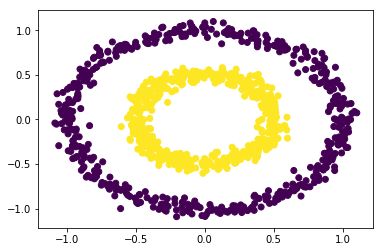

In [12]:
# Generate data
from sklearn.datasets import make_blobs,make_circles,make_moons
x, y = make_circles(n_samples=1000, noise=.05, factor=.5)
plt.scatter(x[:,0],x[:,1],c=y)
print(x.shape)
print(y.shape)

In [13]:
clf = svm.LinearSVC().fit(x, y)

print(clf.coef_)
print(clf.intercept_)

[[-0.00168748  0.00457413]]
[1.65279209e-05]


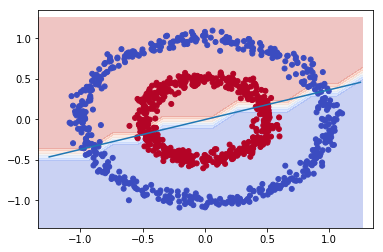

In [14]:
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-1.25, 1.25)
yy = a * xx - (clf.intercept_[0]) / w[1]

# create a mesh to plot in
x_min, x_max = x[:, 0].min() - 0.25, x[:, 0].max() + 0.25
y_min, y_max = x[:, 1].min() - 0.25, x[:, 1].max() + 0.25

xx2, yy2 = np.meshgrid(np.arange(x_min, x_max, .2),
                     np.arange(y_min, y_max, .2))

Z = clf.predict(np.c_[xx2.ravel(), yy2.ravel()])

Z = Z.reshape(xx2.shape)
fig, ax = plt.subplots()
ax.contourf(xx2, yy2, Z, cmap=plt.cm.coolwarm, alpha=0.3)
ax.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.coolwarm, s=25)
ax.plot(xx,yy)

ax.axis([x_min, x_max,y_min, y_max])
plt.show()

### Linear SVC fails! Hence we use non-linear kernels.

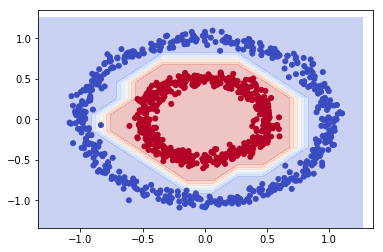

In [15]:
clf = svm.SVC(C=1, kernel='rbf', gamma='auto').fit(x, y)

x_min, x_max = x[:, 0].min() - 0.25, x[:, 0].max() + 0.25
y_min, y_max = x[:, 1].min() - 0.25, x[:, 1].max() + 0.25

xx2, yy2 = np.meshgrid(np.arange(x_min, x_max, .2),
                     np.arange(y_min, y_max, .2))

Z = clf.predict(np.c_[xx2.ravel(), yy2.ravel()])

Z = Z.reshape(xx2.shape)
fig, ax = plt.subplots()
ax.contourf(xx2, yy2, Z, cmap=plt.cm.coolwarm, alpha=0.3)
ax.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.coolwarm, s=25)
# ax.plot(xx,yy)

ax.axis([x_min, x_max,y_min, y_max])
plt.show()



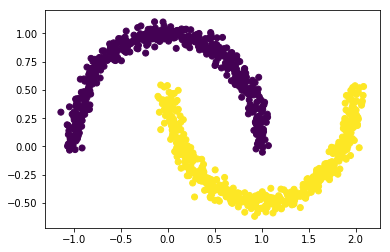

In [16]:
x,y = make_moons(n_samples=1000, noise=.05)
plt.scatter(x[:,0],x[:,1],c=y)

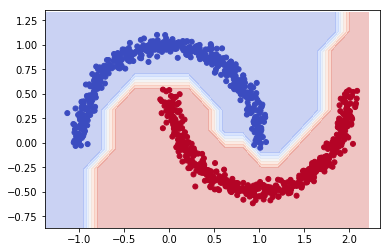

Error: 0.0


In [17]:
clf = svm.SVC(C=1, kernel='rbf', gamma='auto').fit(x, y)

x_min, x_max = x[:, 0].min() - 0.25, x[:, 0].max() + 0.25
y_min, y_max = x[:, 1].min() - 0.25, x[:, 1].max() + 0.25

xx2, yy2 = np.meshgrid(np.arange(x_min, x_max, .2),
                     np.arange(y_min, y_max, .2))

Z = clf.predict(np.c_[xx2.ravel(), yy2.ravel()])
Z = Z.reshape(xx2.shape)
fig, ax = plt.subplots()
plt.contourf(xx2, yy2, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.coolwarm, s=25)

plt.axis([x_min, x_max,y_min, y_max])
plt.show()

def error_finder(x,y,clf):
    res = 0
    for i in range(len(y)):
        prediction = clf.predict([x[i]])[0]
        res += abs(y[i] - prediction)
    print('Error: ' + str(res/len(y)))
error_finder(x,y,clf)

### SVC parameters

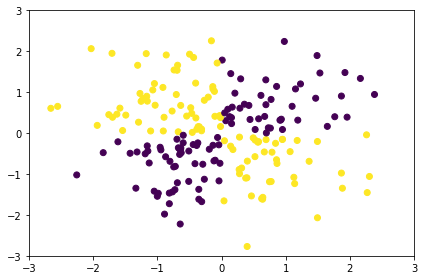

In [18]:
clf = svm.SVC(C=1, kernel='rbf', gamma='auto').fit(x, y)
np.random.seed(0)
x = np.random.randn(200, 2)
y = np.logical_xor(x[:, 0] > 0, x[:, 1] > 0)
y = np.where(y, 1, -1)
plt.scatter(x[:,0],x[:,1],c=y)
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.tight_layout()
plt.show()

x_min, x_max = x[:, 0].min() - 0.25, x[:, 0].max() + 0.25
y_min, y_max = x[:, 1].min() - 0.25, x[:, 1].max() + 0.25
xx2, yy2 = np.meshgrid(np.arange(x_min, x_max, .2),
                     np.arange(y_min, y_max, .2))

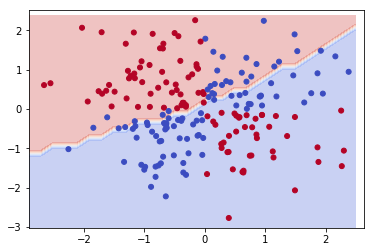

Error: 0.74


In [23]:
clf = svm.SVC(C=1, kernel='rbf', gamma=0.01).fit(x, y)
Z = clf.predict(np.c_[xx2.ravel(), yy2.ravel()])
Z = Z.reshape(xx2.shape)
fig, ax = plt.subplots()
plt.contourf(xx2, yy2, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.coolwarm, s=25)

plt.axis([x_min, x_max,y_min, y_max])
plt.show()
error_finder(x,y,clf)

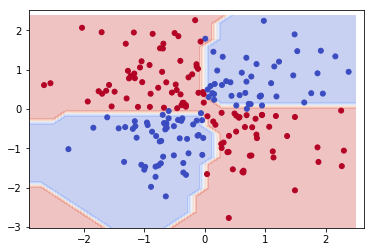

Error: 0.07


In [24]:
clf = svm.SVC(C=1, kernel='rbf', gamma=1).fit(x, y)
Z = clf.predict(np.c_[xx2.ravel(), yy2.ravel()])
Z = Z.reshape(xx2.shape)
fig, ax = plt.subplots()
plt.contourf(xx2, yy2, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.coolwarm, s=25)

plt.axis([x_min, x_max,y_min, y_max])
plt.show()
error_finder(x,y,clf)

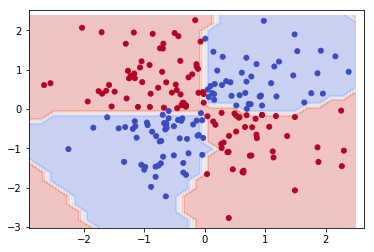

Error: 0.03


In [25]:
clf = svm.SVC(C=10, kernel='rbf', gamma=1).fit(x, y)
Z = clf.predict(np.c_[xx2.ravel(), yy2.ravel()])
Z = Z.reshape(xx2.shape)
fig, ax = plt.subplots()
plt.contourf(xx2, yy2, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.coolwarm, s=25)

plt.axis([x_min, x_max,y_min, y_max])
plt.show()
error_finder(x,y,clf)

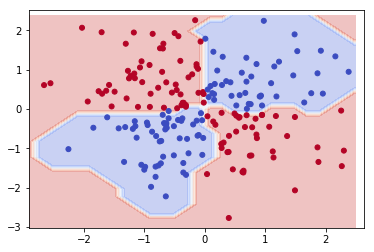

Error: 0.0


In [26]:
clf = svm.SVC(C=10, kernel='rbf', gamma=10).fit(x, y)
Z = clf.predict(np.c_[xx2.ravel(), yy2.ravel()])
Z = Z.reshape(xx2.shape)
fig, ax = plt.subplots()
plt.contourf(xx2, yy2, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.coolwarm, s=25)

plt.axis([x_min, x_max,y_min, y_max])
plt.show()
error_finder(x,y,clf)

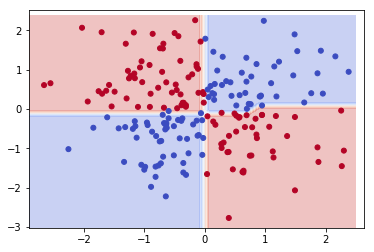

Error: 0.03


In [28]:
clf = svm.SVC(C=10000, kernel='rbf', gamma=0.01).fit(x, y)
Z = clf.predict(np.c_[xx2.ravel(), yy2.ravel()])
Z = Z.reshape(xx2.shape)
fig, ax = plt.subplots()
plt.contourf(xx2, yy2, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.coolwarm, s=25)

plt.axis([x_min, x_max,y_min, y_max])
plt.show()
error_finder(x,y,clf)

<font color='red'>
Signs of overfitting in the above example!
</font>

### Parameter Tuning using GridSearchCV
</br>
<font color='blue'> The module sklearn.model_selection allows us to do a grid search over parameters using GridSearchCV and find the best possible choices! </font>

In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10]}
clf_grid = GridSearchCV(svm.SVC(), param_grid, verbose=1)
clf_grid.fit(x, y)

print("Best Parameters:\n", clf_grid.best_params_)
print("Best Estimators:\n", clf_grid.best_estimator_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters:
 {'C': 100, 'gamma': 1}
Best Estimators:
 SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.2s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


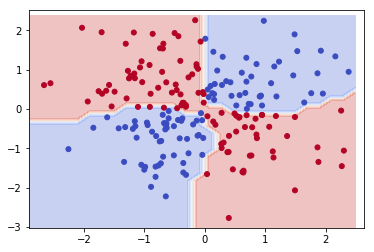

Error: 0.03


In [31]:
Z = clf_grid.predict(np.c_[xx2.ravel(), yy2.ravel()])
Z = Z.reshape(xx2.shape)
fig, ax = plt.subplots()
plt.contourf(xx2, yy2, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.coolwarm, s=25)

plt.axis([x_min, x_max,y_min, y_max])
plt.show()
error_finder(x,y,clf)